In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams['legend.fontsize'] = 33
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
def count_freq(X, Y, sizes):
    # count pairs
    pairs = list(zip(X, Y))
    ind, count = np.unique(pairs, axis=0, return_counts=True)
    cmat = np.zeros(sizes)
    cmat[ind[:, 0], ind[:, 1]] = count
    return cmat / len(pairs)


def raking_ratio(X, Y, marginals, num_iter):
    pmat = count_freq(X, Y, (len(marginals[0]), len(marginals[1])))
    if np.sum(np.sum(pmat, axis=1) == 0) + np.sum(np.sum(pmat, axis=0) == 0) > 0:
        raise RuntimeError(
            "Missing mass in this sample. Try a larger sample size.")
        
    est = [pmat.copy()]
    for i in range(1, num_iter):
        if i % 2 == 0:
            pmat = (marginals[0] / np.sum(pmat, axis=1)).reshape(-1, 1) * pmat
            pmat = pmat * (marginals[1] / np.sum(pmat, axis=1))
        elif i % 2 == 1:
            pmat = (marginals[1] / np.sum(pmat, axis=1)).reshape(-1, 1) * pmat
            pmat = pmat * (marginals[0] / np.sum(pmat, axis=0))
        est.append(pmat.copy())
    return est

In [4]:
np.random.seed(123)

# set true distribution
m = 50
bias = 0.5
transition = np.random.rand(m, m)
transition = np.arange(m + 1)[1:][:, None] * np.arange(m + 1)[1:][None, :] + bias * m * np.ones(shape=(m, m))
transition = transition / transition.sum(axis=0)[None, :]
# px, py = np.sum(prob, axis=1), np.sum(prob, axis=0)
# sortx, sorty = np.argsort(px)[::-1], np.argsort(py)[::-1]
# px, py = px[sortx], py[sorty]
# prob = prob[sortx][:, sorty]
# weight = 0.8
# nums = np.arange(m)
# p = 0.5
# px = weight * np.exp(np.log(scipy.special.binom(m-1, nums)) + nums * np.log(p) + (m - 1 - nums) * np.log(1 - p)) + (1 - weight) * np.ones(m) / m
# # py = np.maximum(np.exp(-lam) * lam ** nums / scipy.special.factorial(nums), 0.0)
# # py /= py.sum()
# p = 0.7
# py = weight * np.exp(np.log(scipy.special.binom(m-1, nums)) + nums * np.log(p) + (m - 1 - nums) * np.log(1 - p)) + (1 - weight) * np.ones(m) / m
# prob = px[None, :] * py[:, None]
# prob /= prob.sum()

weight = 0.8
nums = np.arange(m)
p = 0.7
px = weight * np.exp(np.log(scipy.special.binom(m-1, nums)) + nums * np.log(p) + (m - 1 - nums) * np.log(1 - p)) + (1 - weight) * np.ones(m) / m
prob = transition * px[None, :]
print(prob.sum())
py = prob.sum(axis=1)
marginals = (py, px)


# sample original data
n = 1000
data = np.random.choice(m ** 2, size=(n,), p=prob.reshape(-1))
x = data // m
y = data % m

# get empirical distribution and raked estimators
pmat = count_freq(x, y, (len(marginals[0]), len(marginals[1])))

est = [pmat]
num_iter = 4
for _ in range(num_iter):
     pmat = (marginals[0] / np.sum(pmat, axis=1)).reshape(-1, 1) * pmat
     pmat = pmat * (marginals[1] / np.sum(pmat, axis=0))
     est.append(pmat)

# joint plot supports histograms
def generate(joint, n=1000000):
    np.random.seed(123)
    data = np.random.choice(m ** 2, size=(n,), p=joint.reshape(-1))
    x = data // m
    y = data % m
    return pd.DataFrame({'x': x, 'y': y})

0.9999999999999986


In [64]:
data_color = "dodgerblue"
true_color = "lightsalmon"

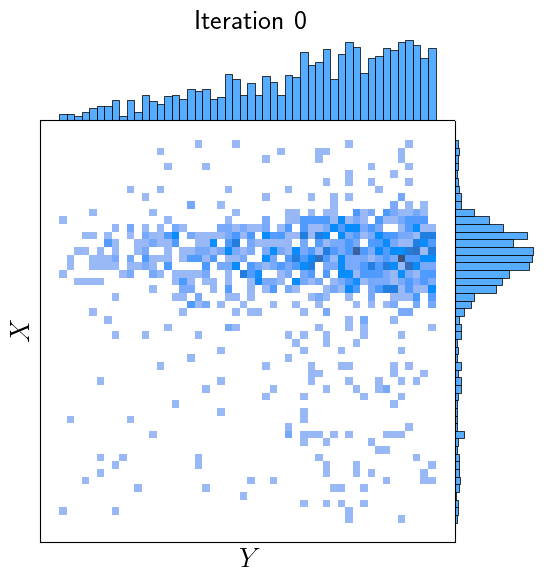

In [65]:
iter = 0
title_size = 20

joint = est[iter]
df = generate(joint)

g = sns.jointplot(data=df, x='x', y='y', kind='hist', bins=(m, m), color=data_color)
# g.ax_marg_y.cla()
# g.ax_marg_x.cla()
# sns.heatmap(data=df['Cost Dif.'].to_numpy().reshape(D, H).T, ax=g.ax_joint, cbar=False, cmap='Blues')
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
g.ax_joint.set_xlabel(r"$Y$")
g.ax_joint.set_ylabel(r"$X$")

g.fig.subplots_adjust(hspace=0.01, wspace=0.01)
g.fig.suptitle(f"Iteration {iter}", y=1.02, fontsize=title_size)

# ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

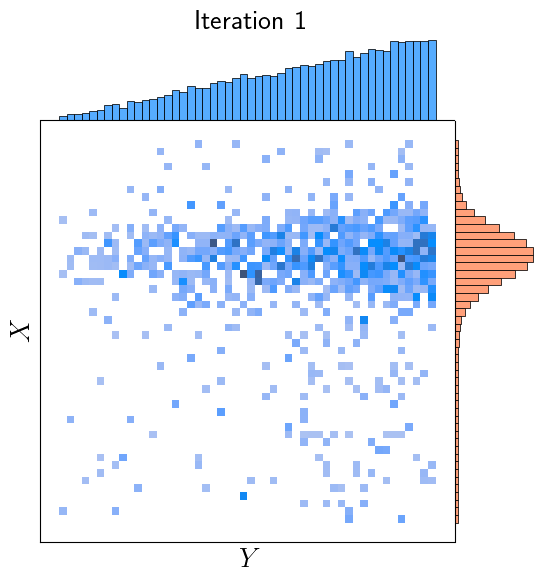

In [66]:
iter = 1
title_size = 20

joint = est[iter]
df = generate(joint)

g = sns.jointplot(data=df, x='x', y='y', kind='hist', bins=(m, m), color=data_color)
# g.ax_marg_y.cla()
# g.ax_marg_x.cla()
# sns.heatmap(data=df['Cost Dif.'].to_numpy().reshape(D, H).T, ax=g.ax_joint, cbar=False, cmap='Blues')
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
g.ax_joint.set_xlabel(r"$Y$")
g.ax_joint.set_ylabel(r"$X$")

for patch in g.ax_marg_y.patches:
    patch.set_facecolor(true_color)

g.fig.subplots_adjust(hspace=0.01, wspace=0.01)
g.fig.suptitle(f"Iteration {iter}", y=1.02, fontsize=title_size)

# ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

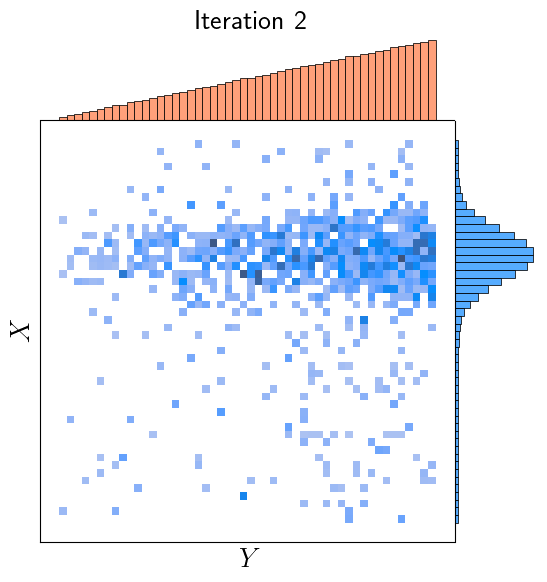

In [67]:
iter = 2
title_size = 20

joint = est[iter]
df = generate(joint)

g = sns.jointplot(data=df, x='x', y='y', kind='hist', bins=(m, m), color=data_color)
# g.ax_marg_y.cla()
# g.ax_marg_x.cla()
# sns.heatmap(data=df['Cost Dif.'].to_numpy().reshape(D, H).T, ax=g.ax_joint, cbar=False, cmap='Blues')
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
g.ax_joint.set_xlabel(r"$Y$")
g.ax_joint.set_ylabel(r"$X$")

for patch in g.ax_marg_x.patches:
    patch.set_facecolor(true_color)

g.fig.subplots_adjust(hspace=0.01, wspace=0.01)
g.fig.suptitle(f"Iteration {iter}", y=1.02, fontsize=title_size)

# ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

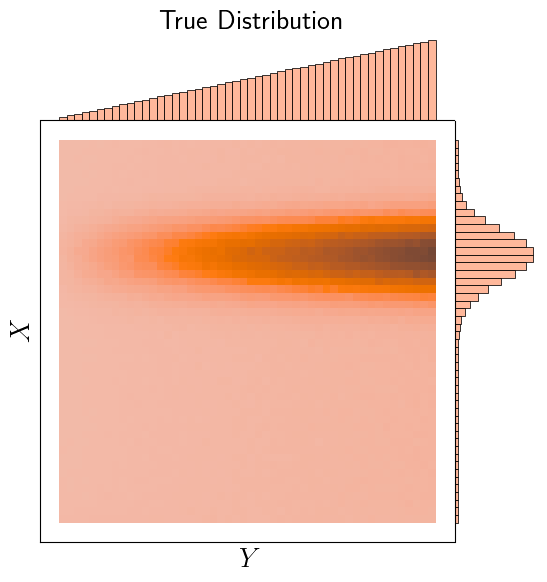

In [68]:
title_size = 20

joint = prob
df = generate(joint)

g = sns.jointplot(data=df, x='x', y='y', kind='hist', bins=(m, m), color=true_color)
# g.ax_marg_y.cla()
# g.ax_marg_x.cla()
# sns.heatmap(data=df['Cost Dif.'].to_numpy().reshape(D, H).T, ax=g.ax_joint, cbar=False, cmap='Blues')
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
g.ax_joint.set_xlabel(r"$Y$")
g.ax_joint.set_ylabel(r"$X$")

g.fig.subplots_adjust(hspace=0.01, wspace=0.01)
g.fig.suptitle(f"True Distribution", y=1.02, fontsize=title_size)

# ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()